<a href="https://colab.research.google.com/github/Gabriel-Machado-GM/Online-Judge-Solutions-Python/blob/main/uva_10567_helping_fill_bates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UVA 10567 - Helping Fill Bates

**@PDF: [UVA 10567 - Helping Fill Bates](https://onlinejudge.org/external/105/10567.pdf)** \
**@AUTOR: [GABRIEL MACHADO](https://github.com/Gabriel-Machado-GM)** \
**@REPO: [ONLINE JUDGE SOLUTIONS PYTHON](https://github.com/Gabriel-Machado-GM/Online-Judge-Solutions-Python)**

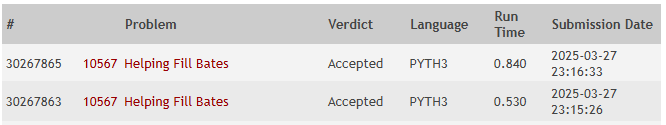

## Problem Description

Everyone knows Fill Bates but I guess fewer people know that he was famous in his high school days for a different reason. I just put below the exact lines from one of his short biographies:

Before high-school graduation, Bates was renowned for designing the class scheduling software that placed him in a class full of girls. With his present success, those girls are probably mutilating themselves for not buying in on an early investment.

Now you are to help him with a completely different purpose. His company has initiated a talent search program in QSA. It has 52 states (the original 50 states plus the two recent troublesome additions Oraq and Malistan). The candidates from the 52 states are given a state identity and a serial number (The serial number is unique). The state identities for the 52 states are the 52 ASCII characters A..Z and a..z. The talent search process is a bit strange. At most 1 million candidates stand in a single line according to the increasing order their serial number (Starting with 0 and then 1, 2, 3 etc) with a placard showing only their state identity (After all who wants to hire employees from Oraq and Malistan). Mr. Fill Gates then writes a sequence of characters (Only alphabets). If candidates are found in that order of states with increasing serial numbers (Some candidates may be skipped for this purpose) then those candidates are taken. Other wise an appropriate message is given.

## Input

The input file contains only one set of input. First line of the input file contains a string S containing only alphabets. The length of this string is at most 1000000. The next line contains an integer Q (0<Q<3501) which indicates the number of queries. Each of the next Q lines contain one string SS of length less than 101. These strings are the strings written by Fill Bates.

## Output

For each query you should output one line. If candidates are not found in the order written by Fill Bates then you should output a string 'Not matched' (Without the quotes), otherwise you should print 'Matched ' (Note that an space is printed after 'Matched') and then the serial of the first candidate in the subsequence and the serial of the last candidate of the subsequence. These two integers should be separated by a single space. If there is more than one such subsequence then choose the one which has smallest starting serial number. If there is a tie choose the one with the smallest ending serial number.

## Sample Input

aaaaaaaaaaaaaabbbbbbbbbdddddddddddccccccccccccc\
3\
aaaaaaaaaaaaaaaaaaa\
aaaaaaaaaaabbbbbbbbbbbc\
abccc


## Sample Output

Not matched\
Not matched\
Matched 0 36

In [ ]:
from sys import stdin, stdout
import time
from bisect import bisect_right

# Optimization: Use a faster input method
def fast_input():
    return stdin.readline().strip()

# Function to find the leftmost value greater than x using binary search
def find_gt(a, x):
    i = bisect_right(a, x)
    if i != len(a):
        return a[i]
    return -1

# Main execution
candidates = fast_input()
indices = [[] for _ in range(ord('z') + 1)]

# Preprocess the candidate string to build the indices
for i, ch in enumerate(candidates):
    indices[ord(ch)].append(i)

n_queries = int(fast_input())

for _ in range(n_queries):
    query = fast_input()
    global_index = -1
    s = e = -1

    for i, ch in enumerate(query):
        global_index = find_gt(indices[ord(ch)], global_index)
        if global_index == -1:
            s = e = -1
            break
        if i == 0:
            s = global_index
        if i == len(query) - 1:
            e = global_index

    if s == -1 or e == -1:
        stdout.write("Not matched\n")
    else:
        stdout.write(f"Matched {s} {e}\n")
